*ASSIGNMENT* - ***1***

In [ ]:
!pip install transformers pandas
import pandas as pd

In [ ]:
df = pd.read_csv("Cosmetic_Product_Reviews.csv")

# sentiment model
from transformers import pipeline
model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# create review_score column
df['review_score'] = df['Review_Text'].apply(lambda x: int(model(x)[0]['label'][0]))

# drop review text
df = df.drop(columns=['Review_Text'])

# save new file
df.to_csv("review_score.csv", index=False)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Step 1: Imports and load CSV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read dataset
df = pd.read_csv("review_score.csv")
print("Loaded data shape:", df.shape)
print(df.head())


Loaded data shape: (1500, 10)
                      Product_Name    Category              Brand    Price  \
0               MAC Serum Everyone       Serum                MAC  1019.01   
1  Charlotte Tilbury Sunscreen Ten   Sunscreen  Charlotte Tilbury  1573.09   
2        Minimalist BB Cream Raise    BB Cream         Minimalist  1421.31   
3         Lakme Sheet Mask Quickly  Sheet Mask              Lakme  2273.99   
4          Maybelline Blush Lawyer       Blush         Maybelline  3315.71   

   Rating Skin_Type Age_Group Purchase_Platform Recommendation  review_score  
0       3      Oily     35-44     Brand Website             No             3  
1       5    Normal     45-54       Tira Beauty            Yes             5  
2       4    Normal     45-54            Myntra            Yes             5  
3       5       Dry     18-24          Flipkart            Yes             5  
4       2      Oily     18-24          Flipkart             No             2  



--- Basic Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       1500 non-null   object 
 1   Category           1500 non-null   object 
 2   Brand              1500 non-null   object 
 3   Price              1500 non-null   float64
 4   Rating             1500 non-null   int64  
 5   Skin_Type          1500 non-null   object 
 6   Age_Group          1500 non-null   object 
 7   Purchase_Platform  1500 non-null   object 
 8   Recommendation     1500 non-null   object 
 9   review_score       1500 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 117.3+ KB
None

--- Missing Values Count ---
Product_Name         0
Category             0
Brand                0
Price                0
Rating               0
Skin_Type            0
Age_Group            0
Purchase_Platform    0
Recomm

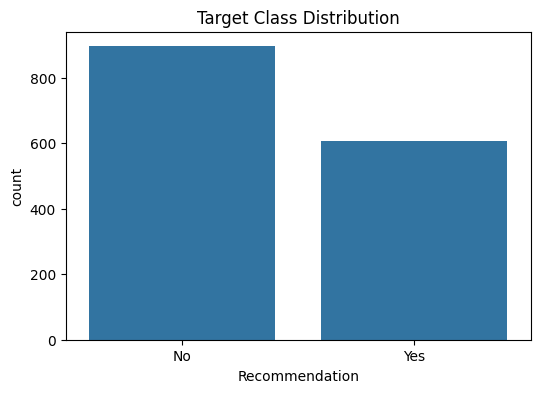

Recommendation
No     895
Yes    605
Name: count, dtype: int64 


--- Unique Values in Categorical Columns ---
Product_Name: 1495 unique values
Category: 19 unique values
Brand: 16 unique values
Skin_Type: 5 unique values
Age_Group: 5 unique values
Purchase_Platform: 7 unique values
Recommendation: 2 unique values


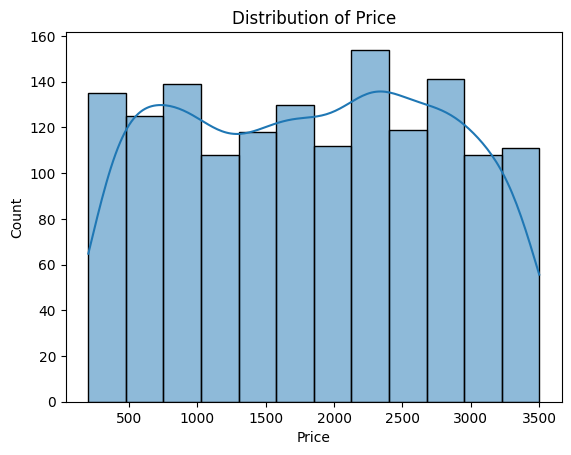

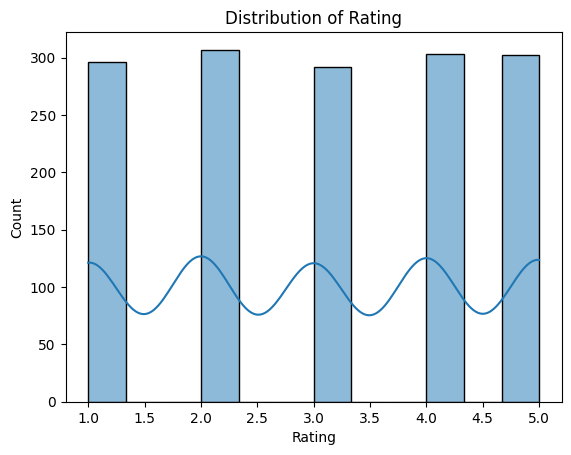

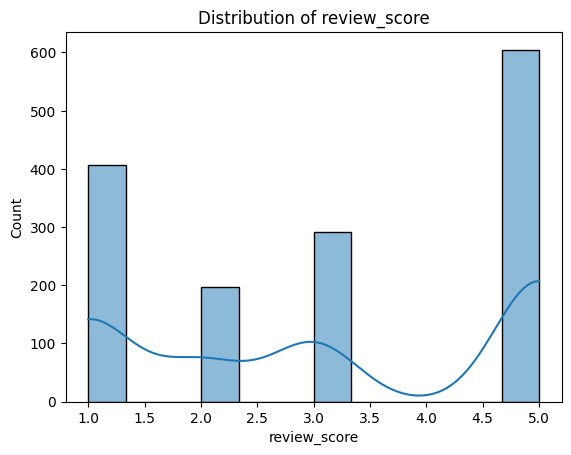

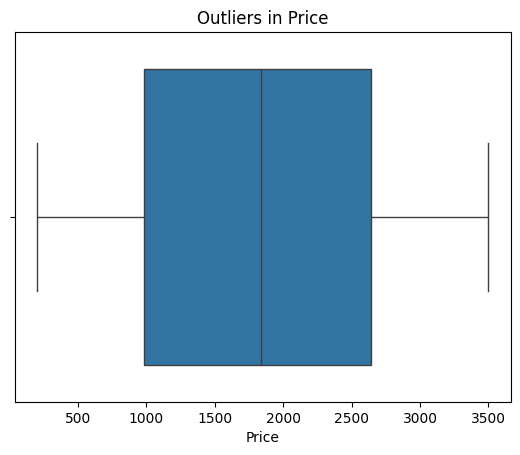

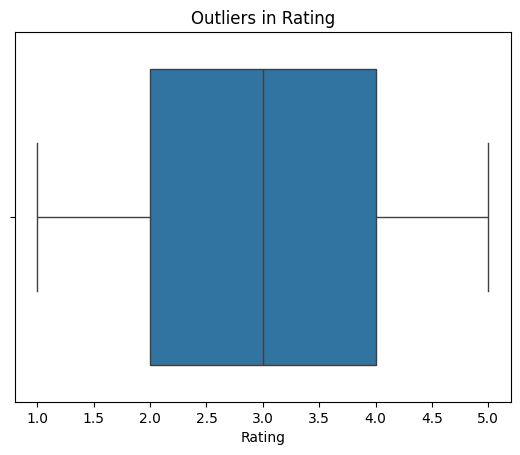

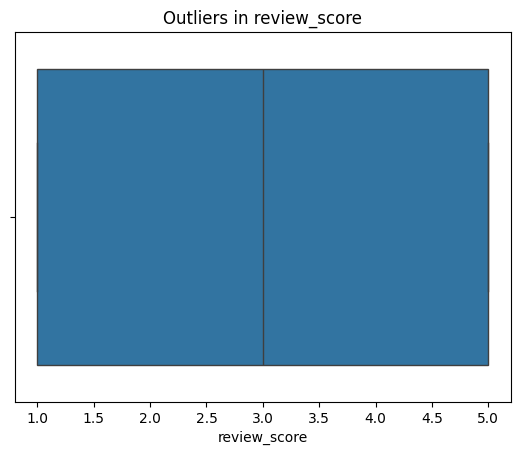

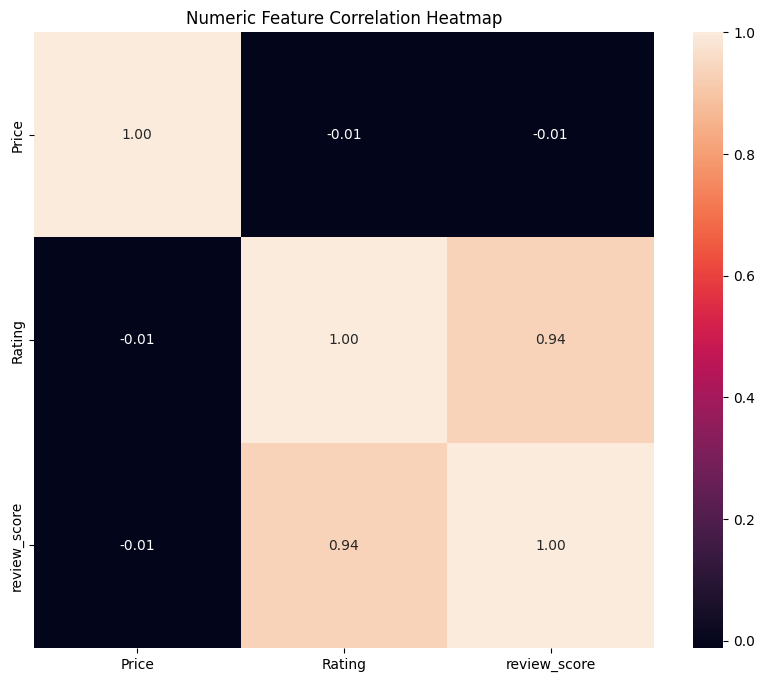

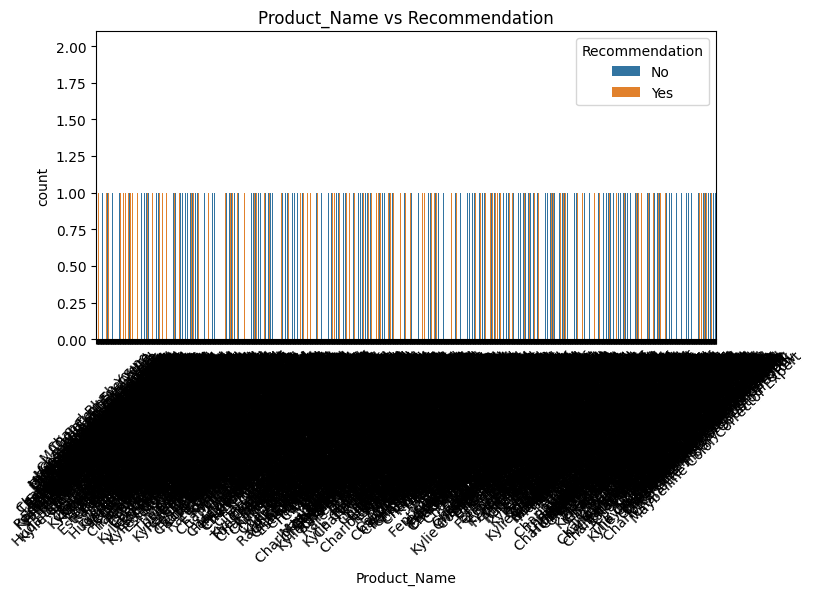

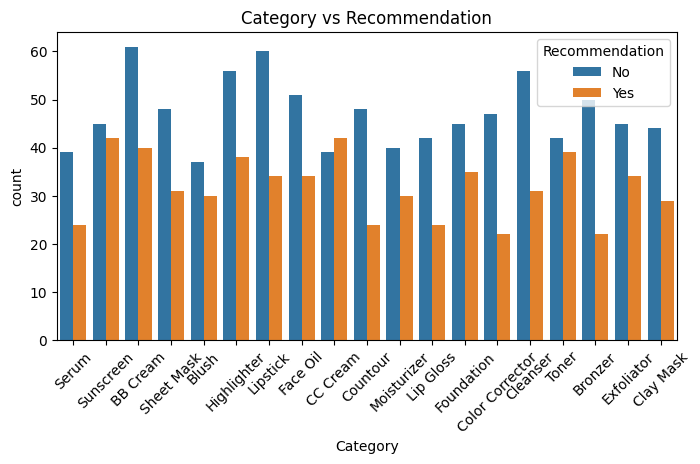

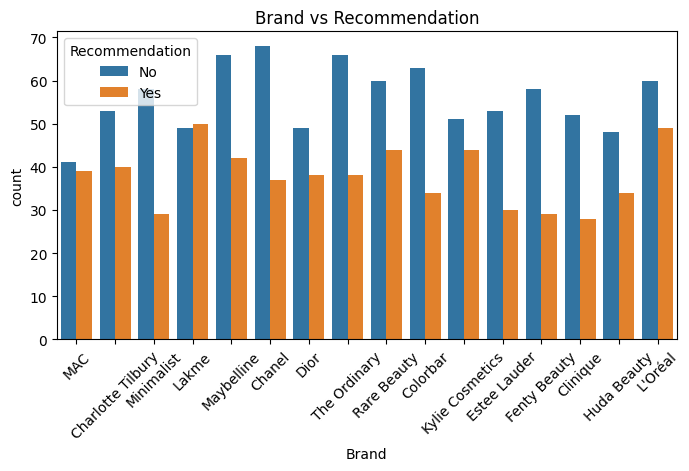

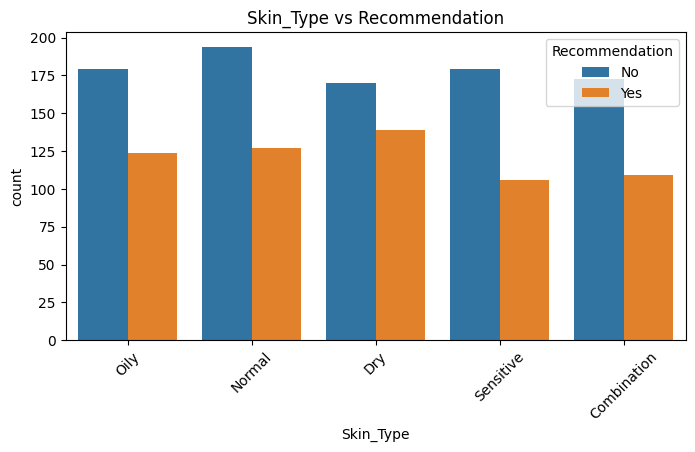

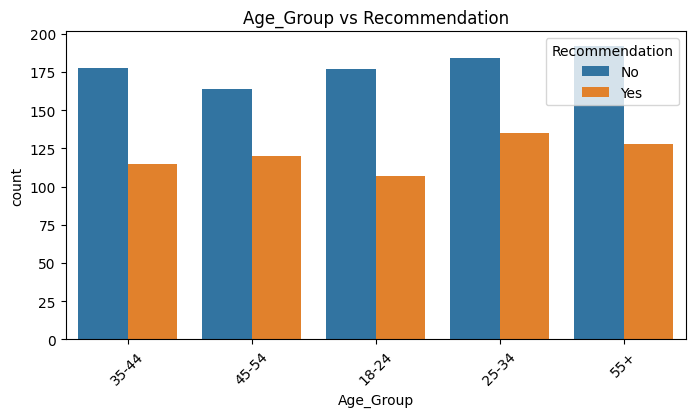

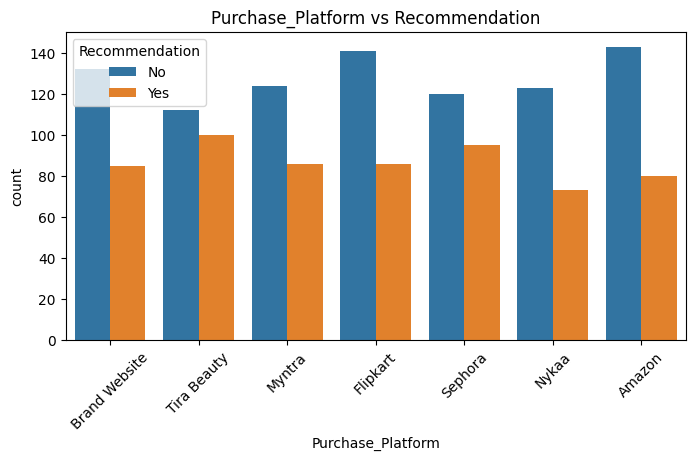

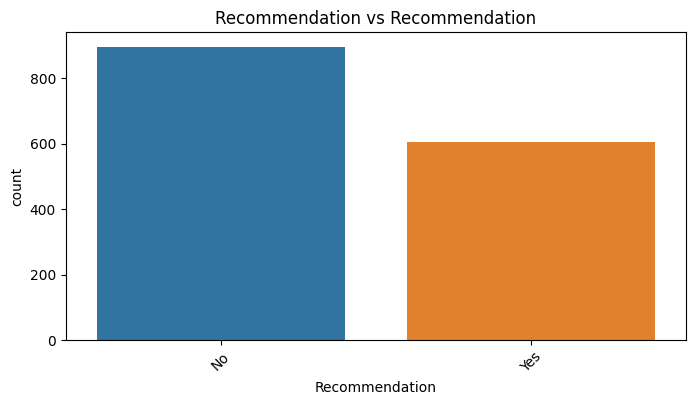

In [ ]:
# ===========================================
# ✅ PART 2 — Enhanced EDA & Data Exploration
# ===========================================

print("\n--- Basic Dataset Info ---")
print(df.info())

print("\n--- Missing Values Count ---")
print(df.isnull().sum())

print("\n--- Numerical Summary ---")
print(df.describe())

print("\n--- Categorical Summary ---")
print(df.describe(include=object))

# ✅ Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Recommendation')
plt.title("Target Class Distribution")
plt.show()
print(df['Recommendation'].value_counts(), "\n")

# ✅ Unique Values in Categorical Columns
print("\n--- Unique Values in Categorical Columns ---")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

# ✅ Numerical Feature Histograms
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# ✅ Boxplots for Outlier Detection
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

# ✅ Correlation Heatmap (before encoding)
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

# ✅ Category vs Target Relationship
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Recommendation')
    plt.title(f"{col} vs Recommendation")
    plt.xticks(rotation=45)
    plt.show()



In [ ]:
# ✅ Step 3: Handle Missing Values

# Drop Product_Name if exists
if 'Product_Name' in df.columns:
    df = df.drop(['Product_Name'], axis=1)

# Fill missing values correctly
for col in df.columns:
    if df[col].dtype == 'O':  # Categorical columns
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    else:  # Numerical columns
        df[col] = df[col].fillna(df[col].median())

print("\nMissing values after fill:\n", df.isnull().sum())



Missing values after fill:
 Category             0
Brand                0
Price                0
Rating               0
Skin_Type            0
Age_Group            0
Purchase_Platform    0
Recommendation       0
review_score         0
dtype: int64


In [ ]:
# Step 4: Label encode the target and one-hot encode categorical features

# 4a: Label encode target 'Recommendation' (Yes/No -> 1/0)
label_enc = LabelEncoder()
if 'Recommendation' in df.columns:
    df['Recommendation'] = label_enc.fit_transform(df['Recommendation'])
    print("Label classes for Recommendation:", list(label_enc.classes_))
else:
    raise KeyError("Target column 'Recommendation' not found.")

# 4b: One-hot encode other categorical columns (drop_first to avoid redundancy)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to one-hot encode:", categorical_cols)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df.shape)
print(df.head())


Label classes for Recommendation: ['No', 'Yes']
Categorical columns to one-hot encode: ['Category', 'Brand', 'Skin_Type', 'Age_Group', 'Purchase_Platform']
Shape after encoding: (1500, 51)
     Price  Rating  Recommendation  review_score  Category_Blush  \
0  1019.01       3               0             3           False   
1  1573.09       5               1             5           False   
2  1421.31       4               1             5           False   
3  2273.99       5               1             5           False   
4  3315.71       2               0             2            True   

   Category_Bronzer  Category_CC Cream  Category_Clay Mask  Category_Cleanser  \
0             False              False               False              False   
1             False              False               False              False   
2             False              False               False              False   
3             False              False               False              False 

In [ ]:
# Step 5: Prepare X and y, then split
X = df.drop('Recommendation', axis=1)
y = df['Recommendation']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1200, 50)
X_test shape: (300, 50)


In [1]:
# Step 6: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: convert back to DataFrame for inspectability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


NameError: name 'StandardScaler' is not defined

In [ ]:
# Step 7: Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)   # you can tune n_neighbors
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)


Accuracy: 73.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       179
           1       0.73      0.55      0.63       121

    accuracy                           0.74       300
   macro avg       0.74      0.71      0.71       300
weighted avg       0.74      0.74      0.73       300


Confusion Matrix:
[[155  24]
 [ 55  66]]


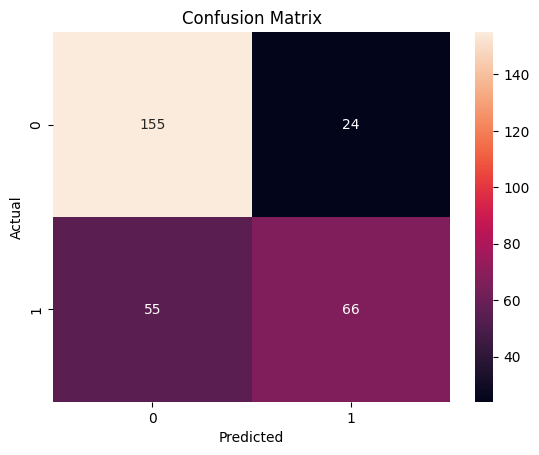

In [ ]:
# Step 8: Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# ===========================================
# ✅ PART 4 — Custom KNN Implementation
# ===========================================

def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2)**2))

class CustomKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict_one(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = self.y_train[k_indices]
        return np.bincount(k_neighbor_labels).argmax()

    def predict(self, X_test):
        return [self.predict_one(x) for x in np.array(X_test)]

# Train Custom KNN
custom_knn = CustomKNN(k=5)
custom_knn.fit(X_train_scaled, y_train)
custom_y_pred = custom_knn.predict(X_test_scaled)

# Evaluate
custom_acc = accuracy_score(y_test, custom_y_pred)
print(f"\n✅ Custom KNN Accuracy: {custom_acc * 100:.2f}%")
print("\nCustom KNN Classification Report:")
print(classification_report(y_test, custom_y_pred))
print("\nCustom KNN Confusion Matrix:")
print(confusion_matrix(y_test, custom_y_pred))



✅ Custom KNN Accuracy: 73.67%

Custom KNN Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       179
           1       0.73      0.55      0.63       121

    accuracy                           0.74       300
   macro avg       0.74      0.71      0.71       300
weighted avg       0.74      0.74      0.73       300


Custom KNN Confusion Matrix:
[[155  24]
 [ 55  66]]



✅ Model Comparison:
         Model  Accuracy %
0  Sklearn KNN   73.666667
1   Custom KNN   73.666667


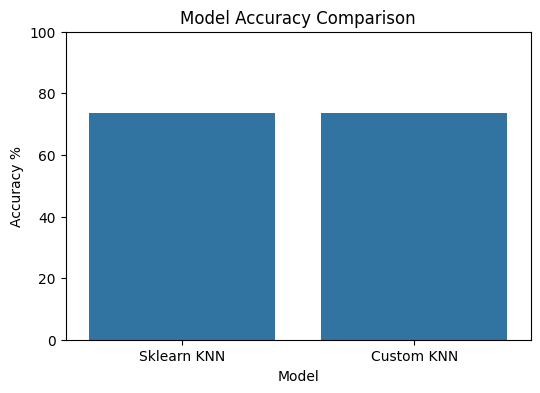

In [ ]:
# ===========================================
# ✅ PART 5 — Result Comparison
# ===========================================

results = pd.DataFrame({
    "Model": ["Sklearn KNN", "Custom KNN"],
    "Accuracy %": [acc * 100, custom_acc * 100]
})

print("\n✅ Model Comparison:")
print(results)

# Visual Comparison Bar Chart
plt.figure(figsize=(6,4))
sns.barplot(data=results, x="Model", y="Accuracy %")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.show()


ASSIGNMENT - ***2***

In [ ]:
!pip install transformers pandas
import pandas as pd

In [ ]:
df = pd.read_csv("Cosmetic_Product_Reviews.csv")

# sentiment model
from transformers import pipeline
model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# create review_score column
df['review_score'] = df['Review_Text'].apply(lambda x: int(model(x)[0]['label'][0]))

# drop review text
df = df.drop(columns=['Review_Text'])

# save new file
df.to_csv("review_score.csv", index=False)

Device set to use cpu


In [ ]:
# analysis.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("review_score.csv")
print("Loaded data shape:", df.shape)
print(df.head())

Loaded data shape: (1500, 10)
                      Product_Name    Category              Brand    Price  \
0               MAC Serum Everyone       Serum                MAC  1019.01   
1  Charlotte Tilbury Sunscreen Ten   Sunscreen  Charlotte Tilbury  1573.09   
2        Minimalist BB Cream Raise    BB Cream         Minimalist  1421.31   
3         Lakme Sheet Mask Quickly  Sheet Mask              Lakme  2273.99   
4          Maybelline Blush Lawyer       Blush         Maybelline  3315.71   

   Rating Skin_Type Age_Group Purchase_Platform Recommendation  review_score  
0       3      Oily     35-44     Brand Website             No             3  
1       5    Normal     45-54       Tira Beauty            Yes             5  
2       4    Normal     45-54            Myntra            Yes             5  
3       5       Dry     18-24          Flipkart            Yes             5  
4       2      Oily     18-24          Flipkart             No             2  


In [ ]:
# --------------------------------------------
# 10 UNIQUE QUESTIONS AND THEIR QUERIES
# --------------------------------------------

print("\n===================== 1. Highest priced product =====================")
print(df.loc[df["Price"].idxmax()])

print("\n===================== 2. Average rating by brand =====================")
print(df.groupby("Brand")["Rating"].mean())

print("\n===================== 3. Count of recommended vs not recommended =====================")
print(df["Recommendation"].value_counts())

print("\n===================== 4. Cheapest product for each category =====================")
print(df.groupby("Category").apply(lambda x: x.nsmallest(1, "Price"))[["Product_Name", "Price"]])

print("\n===================== 5. Most common skin type among customers =====================")
print(df["Skin_Type"].value_counts().idxmax())

print("\n===================== 6. Average price of products by age group =====================")
print(df.groupby("Age_Group")["Price"].mean())

print("\n===================== 7. How many products each brand sells =====================")
print(df["Brand"].value_counts())

print("\n===================== 8. Highest rated products (rating = 5) =====================")
print(df[df["Rating"] == 5][["Product_Name", "Brand"]])

print("\n===================== 9. Does price correlate with rating? =====================")
print(df[["Price", "Rating", "review_score"]].corr())

print("\n===================== 10. Which platform has the most 'Yes' recommendations? =====================")
print(df[df["Recommendation"] == "Yes"]["Purchase_Platform"].value_counts())


===================== 1. Highest priced product =====================
Product_Name         Colorbar CC Cream Value
Category                            CC Cream
Brand                               Colorbar
Price                                3499.62
Rating                                     2
Skin_Type                        Combination
Age_Group                              25-34
Purchase_Platform              Brand Website
Recommendation                            No
review_score                               1
Name: 343, dtype: object

===================== 2. Average rating by brand =====================
Brand
Chanel               2.923810
Charlotte Tilbury    3.118280
Clinique             2.812500
Colorbar             3.072165
Dior                 3.114943
Estee Lauder         2.843373
Fenty Beauty         2.942529
Huda Beauty          3.012195
Kylie Cosmetics      3.273684
L'Oréal              3.146789
Lakme                3.080808
MAC                  3.150000
Maybelline      

/tmp/ipython-input-1397625427.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby("Category").apply(lambda x: x.nsmallest(1, "Price"))[["Product_Name", "Price"]])



===================== CORRELATION MATRIX =====================
                 Price    Rating  review_score
Price         1.000000 -0.012245     -0.010627
Rating       -0.012245  1.000000      0.935947
review_score -0.010627  0.935947      1.000000


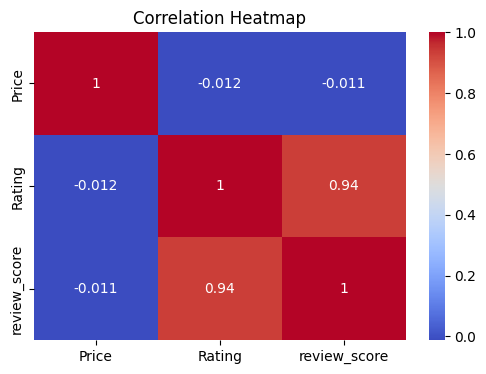

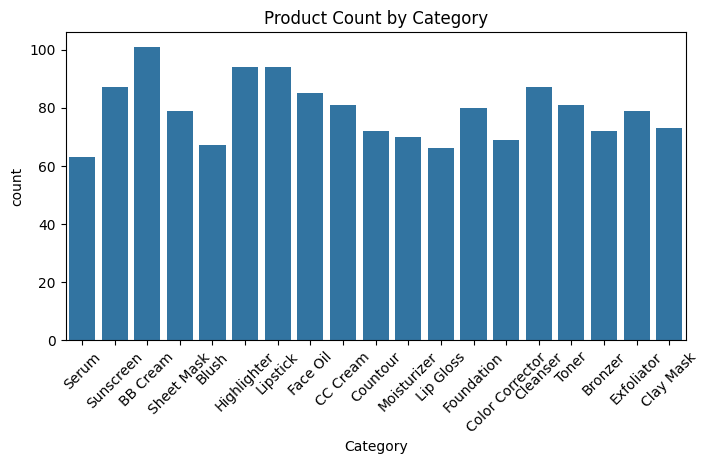

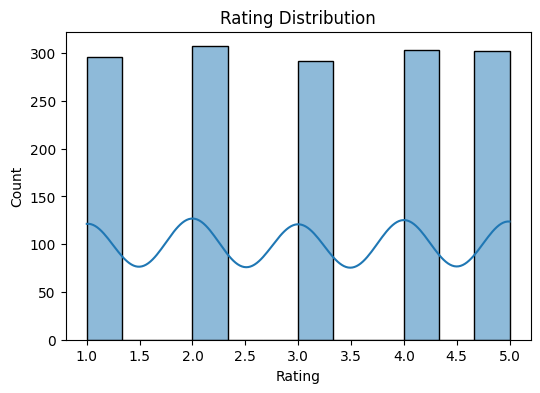

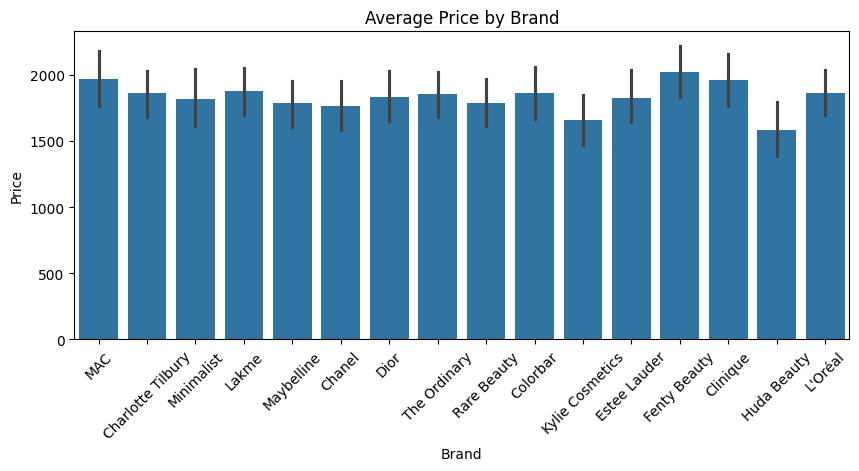

In [ ]:
# --------------------------------------------
# CORRELATION MATRIX + HEATMAP
# --------------------------------------------

numeric_df = df[["Price", "Rating", "review_score"]]
corr_matrix = numeric_df.corr()

print("\n===================== CORRELATION MATRIX =====================")
print(corr_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# --------------------------------------------
# EXTRA VISUALIZATIONS
# --------------------------------------------

# 1. Count plot of categories
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Category")
plt.title("Product Count by Category")
plt.xticks(rotation=45)
plt.show()

# 2. Rating distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["Rating"], kde=True)
plt.title("Rating Distribution")
plt.show()

# 3. Average price by brand
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="Brand", y="Price")
plt.xticks(rotation=45)
plt.title("Average Price by Brand")
plt.show()

In [ ]:
# =======================================
# FEATURE CORRELATION ANALYSIS & SELECTION
# =======================================
import numpy as np
from scipy.stats import chi2_contingency

# Step 1: Prepare all numeric + target
if "Recommendation_bin" not in df.columns and "Recommendation" in df.columns:
    df["Recommendation_bin"] = df["Recommendation"].apply(lambda x: 1 if str(x).strip().lower() == "yes" else 0)
    print("Created Recommendation_bin column for analysis")

numeric_features = [c for c in df.select_dtypes(include=[np.number]).columns if c != "Recommendation_bin"]
corr_matrix = df[numeric_features + ["Recommendation_bin"]].corr()

print("\n=== CORRELATION WITH TARGET (Recommendation_bin) ===")
target_corr = corr_matrix["Recommendation_bin"].drop("Recommendation_bin").abs()
print(target_corr.sort_values(ascending=False))

# Step 2: Identify high correlation among numeric predictors
high_corr_pairs = []
for i, f1 in enumerate(numeric_features):
    for j, f2 in enumerate(numeric_features):
        if j > i and abs(corr_matrix.at[f1, f2]) > 0.7:
            high_corr_pairs.append((f1, f2, corr_matrix.at[f1, f2]))

if high_corr_pairs:
    print("\n=== HIGHLY CORRELATED NUMERIC PAIRS (multicollinearity) ===")
    for f1, f2, corr in high_corr_pairs:
        print(f"{f1} <-> {f2}: {corr:.2f}")

# Step 3: Categorical association (always include all cats)
categorical_features_cat = [c for c in df.columns if df[c].dtype == 'object' and c not in ['Recommendation','Product_Name']]
print("\n=== CRAMER'S V (Categorical vs Target) ===")
cat_scores=[]
for cat in categorical_features_cat:
    contingency = pd.crosstab(df[cat], df['Recommendation_bin'])
    chi2, p, dof, exp = chi2_contingency(contingency)
    n = contingency.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape)-1)))
    print(f"{cat:20}: {cramers_v:.3f}")
    cat_scores.append((cat, cramers_v))

# Step 4: Final feature selection
# -- Always include every categorical column
cats_to_use = categorical_features_cat.copy()

# -- Always include Price even if very low correlation
numerics_to_use = ["Price"]

# -- Between pairs of highly correlated numerics (e.g., Rating/review_score), select only one (the one with higher correlation to target)
used_numeric = set()
for f1, f2, corr in high_corr_pairs:
    c1 = target_corr.get(f1, 0)
    c2 = target_corr.get(f2, 0)
    if abs(c1) >= abs(c2):
        better = f1
    else:
        better = f2
    if better not in numerics_to_use and better not in used_numeric:
        numerics_to_use.append(better)
        used_numeric.update([f1, f2])

# Add any numeric that isn't "Price" or in a high-corr pair but is decently correlated to target (>0.1)
for num in numeric_features:
    if num not in numerics_to_use and num not in used_numeric and target_corr.get(num, 0) > 0.1:
        numerics_to_use.append(num)

final_features = numerics_to_use + cats_to_use
print(f"\nRECOMMENDED FINAL FEATURES FOR MODEL: {final_features}")


=== CORRELATION WITH TARGET (Recommendation_bin) ===
review_score    0.915320
Rating          0.868188
Price           0.009419
Name: Recommendation_bin, dtype: float64

=== HIGHLY CORRELATED NUMERIC PAIRS (multicollinearity) ===
Rating <-> review_score: 0.94

=== CRAMER'S V (Categorical vs Target) ===
Category            : 0.112
Brand               : 0.109
Skin_Type           : 0.054
Age_Group           : 0.036
Purchase_Platform   : 0.077

RECOMMENDED FINAL FEATURES FOR MODEL: ['Price', 'review_score', 'Category', 'Brand', 'Skin_Type', 'Age_Group', 'Purchase_Platform']


In [ ]:
# part3_models.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# sklearn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)

In [ ]:
# ----------------------------
# 1. Load dataset
# ----------------------------
df = pd.read_csv("review_score.csv")
print("Initial shape:", df.shape)
print(df.dtypes)
print(df.head())

# ----------------------------
# 2. Quick data checks and cleaning
# ----------------------------
# 2.1 Missing values
print("\nMissing values per column:\n", df.isna().sum())

# If missing values exist, we'll impute later in the pipeline.

# 2.2 Ensure numeric types
for col in ["Price", "Rating", "review_score"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 2.3 Inspect Recommendation column and make it binary
print("\nRecommendation value counts:\n", df["Recommendation"].value_counts())

# Turn Recommendation to binary label 1 for Yes, 0 for No
df["Recommendation_bin"] = df["Recommendation"].apply(
    lambda x: 1 if str(x).strip().lower() == "yes" else 0
)

# ----------------------------
# 3. Feature selection
# ----------------------------
# Final feature selection
feature_cols = final_features

# Drop any features that don't exist
feature_cols = [c for c in feature_cols if c in df.columns]
print("\nUsing features:", feature_cols)

# Prepare X and target variables
X = df[feature_cols].copy()
y_reg = df["Recommendation_bin"].copy()         # regression target
y_clf = df["Recommendation_bin"].copy()   # classification target

# ----------------------------
# 4. Preprocessing pipelines
# ----------------------------
# Identify numeric & categorical
numeric_features = [
    c for c in feature_cols
    if df[c].dtype in [np.float64, np.int64] or c in ["Price", "Rating"]
]
categorical_features = [c for c in feature_cols if c not in numeric_features]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline (FIXED HERE)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

# ----------------------------
# 5. Train-test split
# ----------------------------
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf,
    test_size=0.25,
    random_state=42,
    stratify=y_clf if y_clf.nunique() > 1 else None
)


Initial shape: (1500, 10)
Product_Name          object
Category              object
Brand                 object
Price                float64
Rating                 int64
Skin_Type             object
Age_Group             object
Purchase_Platform     object
Recommendation        object
review_score           int64
dtype: object
                      Product_Name    Category              Brand    Price  \
0               MAC Serum Everyone       Serum                MAC  1019.01   
1  Charlotte Tilbury Sunscreen Ten   Sunscreen  Charlotte Tilbury  1573.09   
2        Minimalist BB Cream Raise    BB Cream         Minimalist  1421.31   
3         Lakme Sheet Mask Quickly  Sheet Mask              Lakme  2273.99   
4          Maybelline Blush Lawyer       Blush         Maybelline  3315.71   

   Rating Skin_Type Age_Group Purchase_Platform Recommendation  review_score  
0       3      Oily     35-44     Brand Website             No             3  
1       5    Normal     45-54       Tira Be

In [ ]:
# Global evaluation table
model_results = []


# --------------------------
# KNN Regression Model
# --------------------------

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("knn", KNeighborsRegressor())
])

param_grid_knn = {
    "knn__n_neighbors": [3, 5, 7, 9, 11],
    "knn__weights": ["uniform", "distance"]
}

knn_reg = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring="neg_mean_absolute_error")
knn_reg.fit(X_train, y_reg_train)

print("=== KNN Regressor ===")
print("Best KNN params:", knn_reg.best_params_)

# Predictions
y_knn_pred = knn_reg.predict(X_test)

# --------------------------
# Evaluation Metrics
# --------------------------

mae = mean_absolute_error(y_reg_test, y_knn_pred)
mse = mean_squared_error(y_reg_test, y_knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_knn_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# Store results in global table
model_results.append({
    "Model": "KNN Regression",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "Accuracy": None,      # Regression → No accuracy
    "Precision": None,
    "Recall": None,
    "F1": None
})



=== KNN Regressor ===
Best KNN params: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
MAE: 0.06603603083627634
RMSE: 0.16786901035951196
R²: 0.8828401977184573



=== Decision Tree Classifier ===
Best DTC params: {'dtc__max_depth': 3, 'dtc__min_samples_leaf': 1}
Decision Tree Classifier Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       151

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



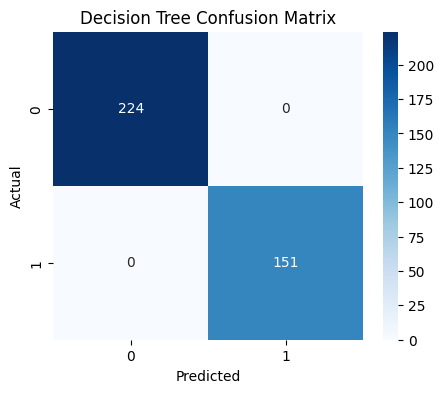

In [ ]:
# ----------------------------
# 7. Model 2: Decision Tree Classifier (Recommendation)
# ----------------------------
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

print("\n=== Decision Tree Classifier ===")
dtc_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("dtc", DecisionTreeClassifier(random_state=42))
])

param_grid_dtc = {
    "dtc__max_depth": [3, 5, 10, None],
    "dtc__min_samples_leaf": [1, 2, 5, 10]
}

gs_dtc = GridSearchCV(dtc_pipeline, param_grid_dtc, cv=5, scoring="accuracy", n_jobs=-1)
gs_dtc.fit(X_train, y_clf_train)

print("Best DTC params:", gs_dtc.best_params_)
dtc_best = gs_dtc.best_estimator_

# Predictions
y_dtc_pred = dtc_best.predict(X_test)

# Metrics
accuracy = accuracy_score(y_clf_test, y_dtc_pred)
precision = precision_score(y_clf_test, y_dtc_pred)
recall = recall_score(y_clf_test, y_dtc_pred)
f1 = f1_score(y_clf_test, y_dtc_pred)

print("Decision Tree Classifier Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_clf_test, y_dtc_pred))

# Confusion matrix
cm = confusion_matrix(y_clf_test, y_dtc_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ----------------------------
# Append metrics to global results
# ----------------------------
model_results.append({
    "Model": "Decision Tree Classifier",
    "MAE": None,
    "RMSE": None,
    "R2": None,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})



=== Decision Tree Regressor (Model 3, predicts Recommendation) ===
Best DTR params: {'dtr__max_depth': 3, 'dtr__min_samples_leaf': 1}
Model 3 - Decision Tree Regressor (on Recommendation):
MAE: 0.0
RMSE: 0.0
R2: 1.0
Accuracy (binarized): 1.0

Classification report (binarized):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       151

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



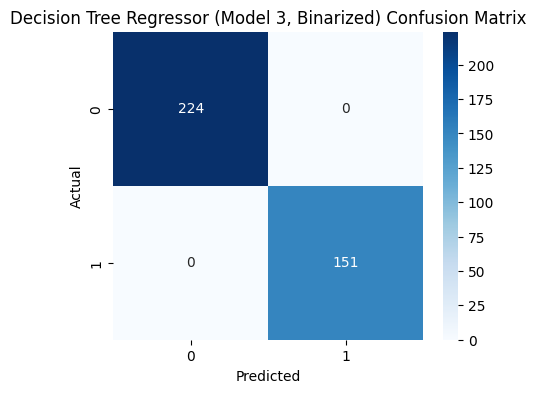

In [ ]:
# ----------------------------
# 8. Model 3: Decision Tree Regressor (predicts Recommendation)
# ----------------------------
print("\n=== Decision Tree Regressor (Model 3, predicts Recommendation) ===")
dtr_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("dtr", DecisionTreeRegressor(random_state=42))
])

param_grid_dtr = {
    "dtr__max_depth": [3, 5, 10, None],
    "dtr__min_samples_leaf": [1, 2, 5, 10]
}

gs_dtr = GridSearchCV(dtr_pipeline, param_grid_dtr, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
gs_dtr.fit(X_train, y_clf_train)

print("Best DTR params:", gs_dtr.best_params_)
dtr_best = gs_dtr.best_estimator_

# Predict 'Recommendation' as regression, then binarize for classifier metrics
y_dtr_pred = dtr_best.predict(X_test)
t = 0.5  # Threshold for binary
# For evaluation, use as classification as well:
y_dtr_pred_bin = (y_dtr_pred >= t).astype(int)

# Regression metrics
mae = mean_absolute_error(y_clf_test, y_dtr_pred)
mse = mean_squared_error(y_clf_test, y_dtr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_clf_test, y_dtr_pred)
# Classification metrics: (binarize predictions)
accuracy = accuracy_score(y_clf_test, y_dtr_pred_bin)
precision = precision_score(y_clf_test, y_dtr_pred_bin)
recall = recall_score(y_clf_test, y_dtr_pred_bin)
f1 = f1_score(y_clf_test, y_dtr_pred_bin)

print("Model 3 - Decision Tree Regressor (on Recommendation):")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Accuracy (binarized):", accuracy)
print("\nClassification report (binarized):\n", classification_report(y_clf_test, y_dtr_pred_bin))

cm = confusion_matrix(y_clf_test, y_dtr_pred_bin)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Regressor Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



model_results.append({
    "Model": "Decision Tree Regressor (Model 3)",
    "MAE": mae,
    "RMSE": rmse,
    "R2": r2,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})




=== Random Forest Classifier ===
Best RFC params: {'rfc__max_depth': 5, 'rfc__min_samples_leaf': 1, 'rfc__n_estimators': 100}
Random Forest Classifier Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       151

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



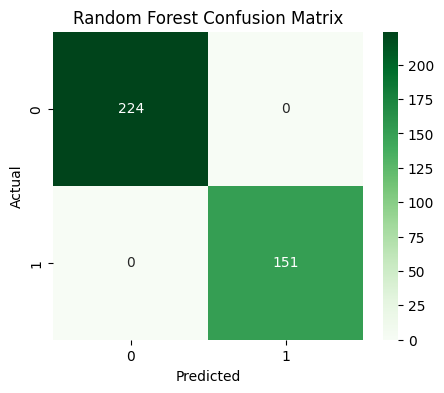

In [ ]:
# ----------------------------
# 9. Model 4: Random Forest Classifier (Recommendation)
# ----------------------------
print("\n=== Random Forest Classifier ===")
rfc_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("rfc", RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid_rfc = {
    "rfc__n_estimators": [100, 200],
    "rfc__max_depth": [5, 10, None],
    "rfc__min_samples_leaf": [1, 2, 5]
}

gs_rfc = GridSearchCV(rfc_pipeline, param_grid_rfc, cv=3, scoring="accuracy", n_jobs=-1)
gs_rfc.fit(X_train, y_clf_train)

print("Best RFC params:", gs_rfc.best_params_)
rfc_best = gs_rfc.best_estimator_

# Predictions
y_rfc_pred = rfc_best.predict(X_test)

# Metrics
accuracy = accuracy_score(y_clf_test, y_rfc_pred)
precision = precision_score(y_clf_test, y_rfc_pred)
recall = recall_score(y_clf_test, y_rfc_pred)
f1 = f1_score(y_clf_test, y_rfc_pred)

print("Random Forest Classifier Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_clf_test, y_rfc_pred))

# Confusion matrix
cm2 = confusion_matrix(y_clf_test, y_rfc_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------
# Append metrics to global results
# ----------------------------
model_results.append({
    "Model": "Random Forest Classifier",
    "MAE": None,
    "RMSE": None,
    "R2": None,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})



=== Support Vector Machine (SVM) Classifier ===
Best SVM params: {'svm__C': 0.1, 'svm__kernel': 'linear'}
SVM Classifier Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       151

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



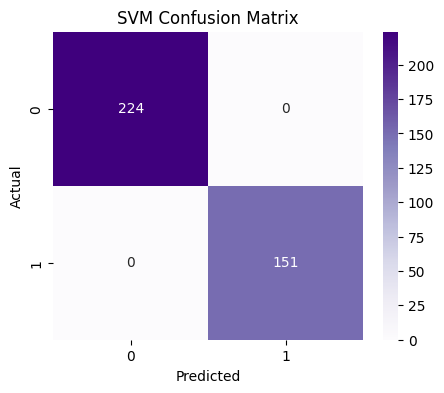

In [ ]:
# ----------------------------
# Support Vector Machine (SVM) Classifier (Recommendation)
# ----------------------------
from sklearn.svm import SVC

print("\n=== Support Vector Machine (SVM) Classifier ===")
svm_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("svm", SVC(probability=True, random_state=42))
])

param_grid_svm = {
    "svm__C": [0.1, 1, 10],
    "svm__kernel": ["linear", "rbf"]
}

gs_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
gs_svm.fit(X_train, y_clf_train)

print("Best SVM params:", gs_svm.best_params_)
svm_best = gs_svm.best_estimator_

y_svm_pred = svm_best.predict(X_test)

accuracy = accuracy_score(y_clf_test, y_svm_pred)
precision = precision_score(y_clf_test, y_svm_pred)
recall = recall_score(y_clf_test, y_svm_pred)
f1 = f1_score(y_clf_test, y_svm_pred)

print("SVM Classifier Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_clf_test, y_svm_pred))

cm3 = confusion_matrix(y_clf_test, y_svm_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

model_results.append({
    "Model": "SVM Classifier",
    "MAE": None,
    "RMSE": None,
    "R2": None,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})



=== Naive-Bayes Classifier ===
Naive-Bayes Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       151

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



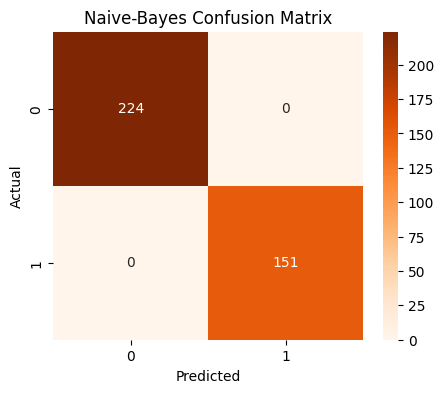

In [ ]:
# ----------------------------
# Naive-Bayes Classifier (Recommendation)
# ----------------------------
from sklearn.naive_bayes import GaussianNB

print("\n=== Naive-Bayes Classifier ===")
# We need to transform X because GaussianNB does not handle categorical features directly
X_train_nb = preprocessor.fit_transform(X_train)
X_test_nb = preprocessor.transform(X_test)
nb = GaussianNB()
nb.fit(X_train_nb, y_clf_train)

y_nb_pred = nb.predict(X_test_nb)

accuracy = accuracy_score(y_clf_test, y_nb_pred)
precision = precision_score(y_clf_test, y_nb_pred)
recall = recall_score(y_clf_test, y_nb_pred)
f1 = f1_score(y_clf_test, y_nb_pred)

print("Naive-Bayes Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_clf_test, y_nb_pred))

cm4 = confusion_matrix(y_clf_test, y_nb_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm4, annot=True, fmt="d", cmap="Oranges")
plt.title("Naive-Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

model_results.append({
    "Model": "Naive-Bayes Classifier",
    "MAE": None,
    "RMSE": None,
    "R2": None,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})



=== Logistic Regression Classifier ===
Best Logistic Regression params: {'logreg__C': 0.01}
Logistic Regression Classifier Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       151

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



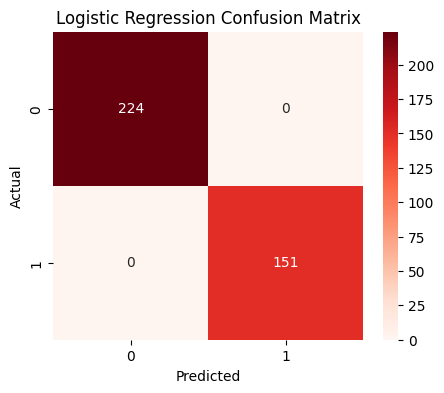

In [ ]:
# ----------------------------
# Logistic Regression Classifier (Recommendation)
# ----------------------------
from sklearn.linear_model import LogisticRegression

print("\n=== Logistic Regression Classifier ===")
logreg_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("logreg", LogisticRegression(max_iter=500, random_state=42))
])

param_grid_logreg = {
    "logreg__C": [0.01, 0.1, 1, 10]
}

gs_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring="accuracy", n_jobs=-1)
gs_logreg.fit(X_train, y_clf_train)

print("Best Logistic Regression params:", gs_logreg.best_params_)
logreg_best = gs_logreg.best_estimator_

y_logreg_pred = logreg_best.predict(X_test)

accuracy = accuracy_score(y_clf_test, y_logreg_pred)
precision = precision_score(y_clf_test, y_logreg_pred)
recall = recall_score(y_clf_test, y_logreg_pred)
f1 = f1_score(y_clf_test, y_logreg_pred)

print("Logistic Regression Classifier Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_clf_test, y_logreg_pred))

cm5 = confusion_matrix(y_clf_test, y_logreg_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm5, annot=True, fmt="d", cmap="Reds")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

model_results.append({
    "Model": "Logistic Regression Classifier",
    "MAE": None,
    "RMSE": None,
    "R2": None,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})



=== AdaBoost Classifier ===
Best AdaBoost params: {'adb__learning_rate': 0.5, 'adb__n_estimators': 50}
AdaBoost Classifier Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       151

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



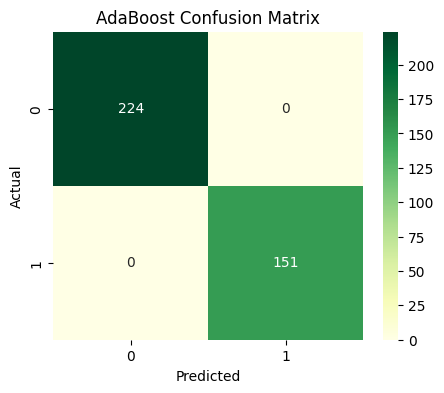

In [ ]:
# ----------------------------
# AdaBoost Classifier (Recommendation)
# ----------------------------
from sklearn.ensemble import AdaBoostClassifier

print("\n=== AdaBoost Classifier ===")
adaboost_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("adb", AdaBoostClassifier(random_state=42))
])

param_grid_ada = {
    "adb__n_estimators": [50, 100, 200],
    "adb__learning_rate": [0.5, 1.0, 1.5]
}

gs_ada = GridSearchCV(adaboost_pipeline, param_grid_ada, cv=5, scoring="accuracy", n_jobs=-1)
gs_ada.fit(X_train, y_clf_train)

print("Best AdaBoost params:", gs_ada.best_params_)
ada_best = gs_ada.best_estimator_

y_ada_pred = ada_best.predict(X_test)

accuracy = accuracy_score(y_clf_test, y_ada_pred)
precision = precision_score(y_clf_test, y_ada_pred)
recall = recall_score(y_clf_test, y_ada_pred)
f1 = f1_score(y_clf_test, y_ada_pred)

print("AdaBoost Classifier Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_clf_test, y_ada_pred))

cm6 = confusion_matrix(y_clf_test, y_ada_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm6, annot=True, fmt="d", cmap="YlGn")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

model_results.append({
    "Model": "AdaBoost Classifier",
    "MAE": None,
    "RMSE": None,
    "R2": None,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})



=== Gradient Boosting Classifier ===
Best Gradient Boosting params: {'gb__learning_rate': 0.05, 'gb__max_depth': 3, 'gb__n_estimators': 100}
Gradient Boosting Classifier Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       151

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



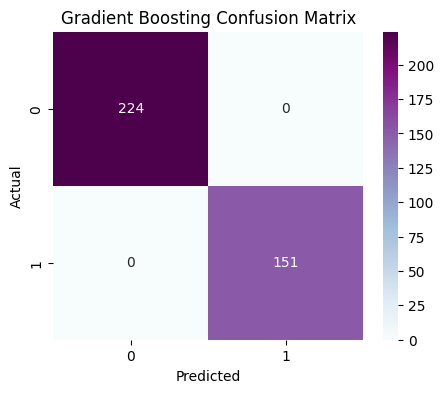

In [ ]:
# ----------------------------
# Gradient Boosting Classifier (Recommendation)
# ----------------------------
from sklearn.ensemble import GradientBoostingClassifier

print("\n=== Gradient Boosting Classifier ===")
gb_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("gb", GradientBoostingClassifier(random_state=42))
])

param_grid_gb = {
    "gb__n_estimators": [100, 200],
    "gb__learning_rate": [0.05, 0.1, 0.2],
    "gb__max_depth": [3, 5]
}

gs_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=5, scoring="accuracy", n_jobs=-1)
gs_gb.fit(X_train, y_clf_train)

print("Best Gradient Boosting params:", gs_gb.best_params_)
gb_best = gs_gb.best_estimator_

y_gb_pred = gb_best.predict(X_test)

accuracy = accuracy_score(y_clf_test, y_gb_pred)
precision = precision_score(y_clf_test, y_gb_pred)
recall = recall_score(y_clf_test, y_gb_pred)
f1 = f1_score(y_clf_test, y_gb_pred)

print("Gradient Boosting Classifier Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_clf_test, y_gb_pred))

cm7 = confusion_matrix(y_clf_test, y_gb_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm7, annot=True, fmt="d", cmap="BuPu")
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

model_results.append({
    "Model": "Gradient Boosting Classifier",
    "MAE": None,
    "RMSE": None,
    "R2": None,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})



=== Extra Trees Classifier ===
Best Extra Trees params: {'etc__max_depth': 5, 'etc__min_samples_leaf': 1, 'etc__n_estimators': 100}
Extra Trees Classifier Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       151

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



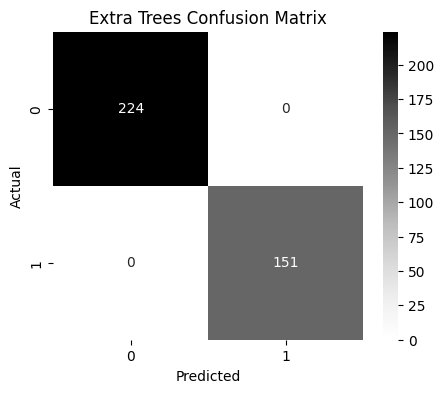

In [ ]:
# ----------------------------
# Extra Trees Classifier (Recommendation)
# ----------------------------
from sklearn.ensemble import ExtraTreesClassifier

print("\n=== Extra Trees Classifier ===")
etc_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("etc", ExtraTreesClassifier(random_state=42, n_jobs=-1))
])

param_grid_etc = {
    "etc__n_estimators": [100, 200],
    "etc__max_depth": [5, 10, None],
    "etc__min_samples_leaf": [1, 2, 5]
}

gs_etc = GridSearchCV(etc_pipeline, param_grid_etc, cv=5, scoring="accuracy", n_jobs=-1)
gs_etc.fit(X_train, y_clf_train)

print("Best Extra Trees params:", gs_etc.best_params_)
etc_best = gs_etc.best_estimator_

y_etc_pred = etc_best.predict(X_test)

accuracy = accuracy_score(y_clf_test, y_etc_pred)
precision = precision_score(y_clf_test, y_etc_pred)
recall = recall_score(y_clf_test, y_etc_pred)
f1 = f1_score(y_clf_test, y_etc_pred)

print("Extra Trees Classifier Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_clf_test, y_etc_pred))

cm8 = confusion_matrix(y_clf_test, y_etc_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm8, annot=True, fmt="d", cmap="Greys")
plt.title("Extra Trees Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

model_results.append({
    "Model": "Extra Trees Classifier",
    "MAE": None,
    "RMSE": None,
    "R2": None,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})



=== Decision Tree Classifier Evaluation ===


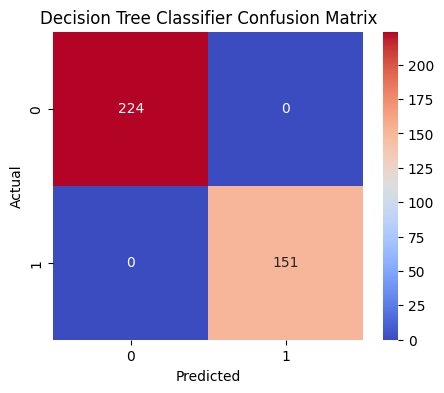

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       224
           1     1.0000    1.0000    1.0000       151

    accuracy                         1.0000       375
   macro avg     1.0000    1.0000    1.0000       375
weighted avg     1.0000    1.0000    1.0000       375


=== Random Forest Classifier Evaluation ===


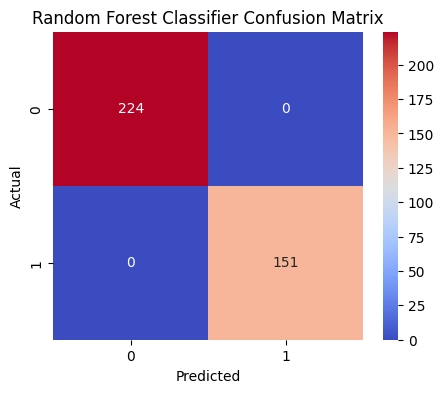

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       224
           1     1.0000    1.0000    1.0000       151

    accuracy                         1.0000       375
   macro avg     1.0000    1.0000    1.0000       375
weighted avg     1.0000    1.0000    1.0000       375


=== SVM Classifier Evaluation ===


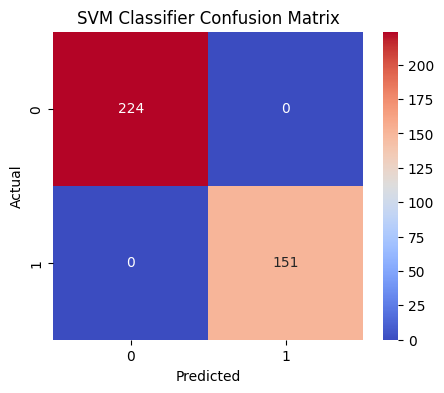

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       224
           1     1.0000    1.0000    1.0000       151

    accuracy                         1.0000       375
   macro avg     1.0000    1.0000    1.0000       375
weighted avg     1.0000    1.0000    1.0000       375


=== Naive-Bayes Classifier Evaluation ===


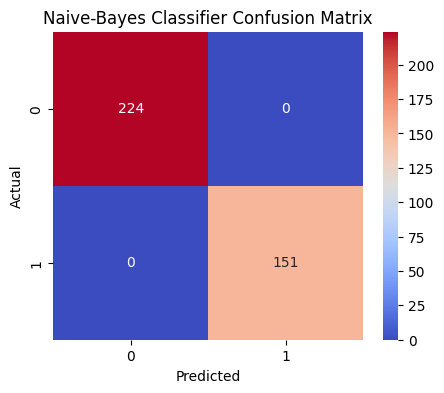

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       224
           1     1.0000    1.0000    1.0000       151

    accuracy                         1.0000       375
   macro avg     1.0000    1.0000    1.0000       375
weighted avg     1.0000    1.0000    1.0000       375


=== Logistic Regression Classifier Evaluation ===


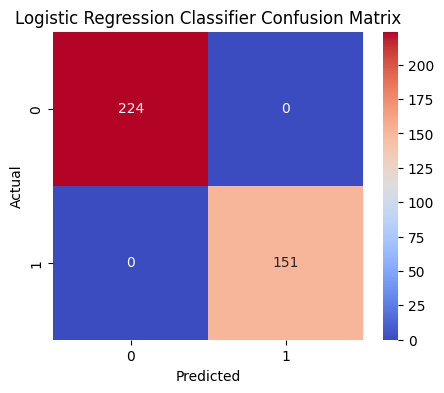

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       224
           1     1.0000    1.0000    1.0000       151

    accuracy                         1.0000       375
   macro avg     1.0000    1.0000    1.0000       375
weighted avg     1.0000    1.0000    1.0000       375


=== AdaBoost Classifier Evaluation ===


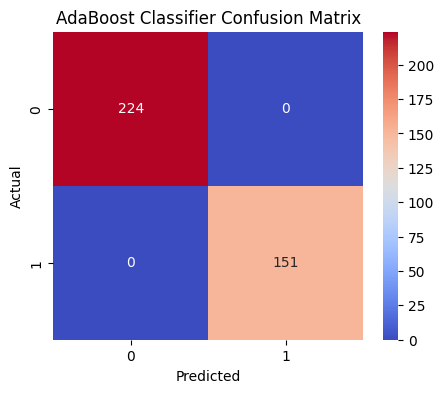

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       224
           1     1.0000    1.0000    1.0000       151

    accuracy                         1.0000       375
   macro avg     1.0000    1.0000    1.0000       375
weighted avg     1.0000    1.0000    1.0000       375


=== Gradient Boosting Classifier Evaluation ===


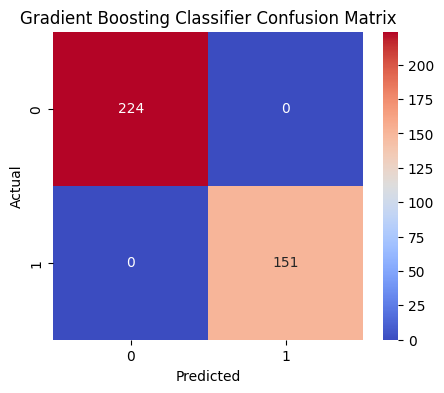

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       224
           1     1.0000    1.0000    1.0000       151

    accuracy                         1.0000       375
   macro avg     1.0000    1.0000    1.0000       375
weighted avg     1.0000    1.0000    1.0000       375


=== Extra Trees Classifier Evaluation ===


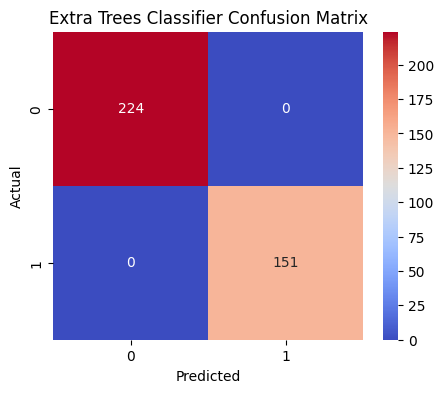

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       224
           1     1.0000    1.0000    1.0000       151

    accuracy                         1.0000       375
   macro avg     1.0000    1.0000    1.0000       375
weighted avg     1.0000    1.0000    1.0000       375


=== Decision Tree Regressor (Model 3, Binarized) Evaluation ===


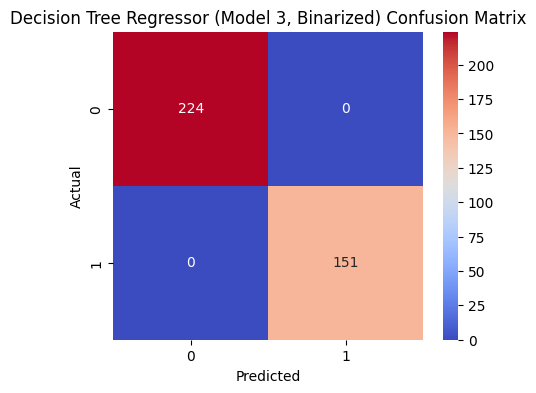

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       224
           1     1.0000    1.0000    1.0000       151

    accuracy                         1.0000       375
   macro avg     1.0000    1.0000    1.0000       375
weighted avg     1.0000    1.0000    1.0000       375


=== KNN Regressor Evaluation ===
MAE: 0.0660
RMSE: 0.1679
R²: 0.8828


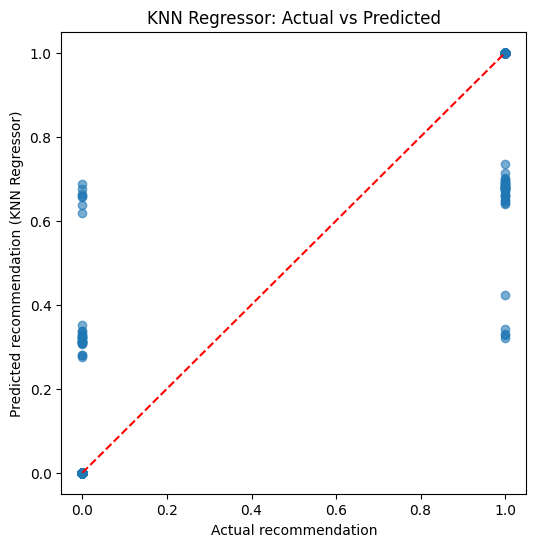

In [ ]:
# ================================
# PART 5: Model Evaluation & Heatmaps (ALL MODELS)
# ================================
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, classification_report

# List all classifier and regression models with their predictions
classifier_models = {
    "Decision Tree Classifier": y_dtc_pred,
    "Random Forest Classifier": y_rfc_pred,
    "SVM Classifier": y_svm_pred,
    "Naive-Bayes Classifier": y_nb_pred,
    "Logistic Regression Classifier": y_logreg_pred,
    "AdaBoost Classifier": y_ada_pred,
    "Gradient Boosting Classifier": y_gb_pred,
    "Extra Trees Classifier": y_etc_pred,
    # Include any other classifier predictions
}
# For DecisionTreeRegressor used for Recommendation (Model 3)
classifier_models["Decision Tree Regressor (Model 3, Binarized)"] = y_dtr_pred_bin

regressor_models = {
    "KNN Regressor": y_knn_pred,
    # Note: Model 3 Decision Tree Regressor metrics are printed above as classification too
}

for name, y_pred in classifier_models.items():
    print(f"\n=== {name} Evaluation ===")
    cm = confusion_matrix(y_clf_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print(classification_report(y_clf_test, y_pred, digits=4))

for name, y_pred in regressor_models.items():
    mae = mean_absolute_error(y_reg_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred))
    r2 = r2_score(y_reg_test, y_pred)
    print(f"\n=== {name} Evaluation ===")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    plt.figure(figsize=(6,6))
    plt.scatter(y_reg_test, y_pred, alpha=0.6)
    plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
    plt.xlabel("Actual recommendation")
    plt.ylabel(f"Predicted recommendation ({name})")
    plt.title(f"{name}: Actual vs Predicted")
    plt.show()



In [ ]:
# ================================
# PART 6: K-Fold Cross-Validation (ALL MODELS)
# ================================
from sklearn.model_selection import cross_val_score, KFold

K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Extended regression models (if any)
extended_regressors = {
    "KNN Regressor": knn_pipeline,
    # You could add the DecisionTreeRegressor predicting Recommendation here (but it's a classifier task, so KNN only for regression)
}

print(f"\n=== {K}-Fold Cross-Validation: Regressors ===")
for name, model in extended_regressors.items():
    scores = cross_val_score(model, X, y_reg, cv=kf, scoring="r2", n_jobs=-1)
    print(f"{name}: R² Scores = {scores}")
    print(f"{name}: Average R² = {scores.mean():.4f}, Std = {scores.std():.4f}\n")

# All classifier pipelines (including the new ones)
extended_classifiers = {
    "Decision Tree Classifier": dtc_pipeline,
    "Random Forest Classifier": rfc_pipeline,
    "SVM Classifier": svm_pipeline,
    "Naive-Bayes Classifier": nb,  # GaussianNB uses already-transformed data
    "Logistic Regression Classifier": logreg_pipeline,
    "AdaBoost Classifier": adaboost_pipeline,
    "Gradient Boosting Classifier": gb_pipeline,
    "Extra Trees Classifier": etc_pipeline,
    # For DecisionTreeRegressor-as-classifier can be added if needed
}

print(f"\n=== {K}-Fold Cross-Validation: Classifiers ===")
for name, model in extended_classifiers.items():
    # Special handling for Naive-Bayes: uses already-encoded data
    if name == "Naive-Bayes Classifier":
        scores = cross_val_score(model, preprocessor.fit_transform(X), y_clf, cv=kf, scoring="accuracy", n_jobs=-1)
    else:
        scores = cross_val_score(model, X, y_clf, cv=kf, scoring="accuracy", n_jobs=-1)
    print(f"{name}: Accuracy Scores = {scores}")
    print(f"{name}: Average Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}\n")




=== 5-Fold Cross-Validation: Regressors ===
KNN Regressor: R² Scores = [0.86441894 0.8542869  0.86440678 0.86053944 0.86645558]
KNN Regressor: Average R² = 0.8620, Std = 0.0043


=== 5-Fold Cross-Validation: Classifiers ===
Decision Tree Classifier: Accuracy Scores = [1. 1. 1. 1. 1.]
Decision Tree Classifier: Average Accuracy = 1.0000, Std = 0.0000

Random Forest Classifier: Accuracy Scores = [1. 1. 1. 1. 1.]
Random Forest Classifier: Average Accuracy = 1.0000, Std = 0.0000

SVM Classifier: Accuracy Scores = [1. 1. 1. 1. 1.]
SVM Classifier: Average Accuracy = 1.0000, Std = 0.0000

Naive-Bayes Classifier: Accuracy Scores = [1. 1. 1. 1. 1.]
Naive-Bayes Classifier: Average Accuracy = 1.0000, Std = 0.0000

Logistic Regression Classifier: Accuracy Scores = [1. 1. 1. 1. 1.]
Logistic Regression Classifier: Average Accuracy = 1.0000, Std = 0.0000

AdaBoost Classifier: Accuracy Scores = [1. 1. 1. 1. 1.]
AdaBoost Classifier: Average Accuracy = 1.0000, Std = 0.0000

Gradient Boosting Classifier:


===================== All Model Evaluations (Updated) =====================
Model: KNN Regression
MAE: 0.0660
RMSE: 0.1679
R²: 0.8828
--------------------------------------------------
Model: Decision Tree Classifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
--------------------------------------------------
Model: Decision Tree Regressor (Model 3)
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
MAE: 0.0000
RMSE: 0.0000
R²: 1.0000
--------------------------------------------------
Model: Random Forest Classifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
--------------------------------------------------
Model: SVM Classifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
--------------------------------------------------
Model: Naive-Bayes Classifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
--------------------------------------------------
Model: Logistic Regression Classifier
Accuracy: 1.0000
Precis

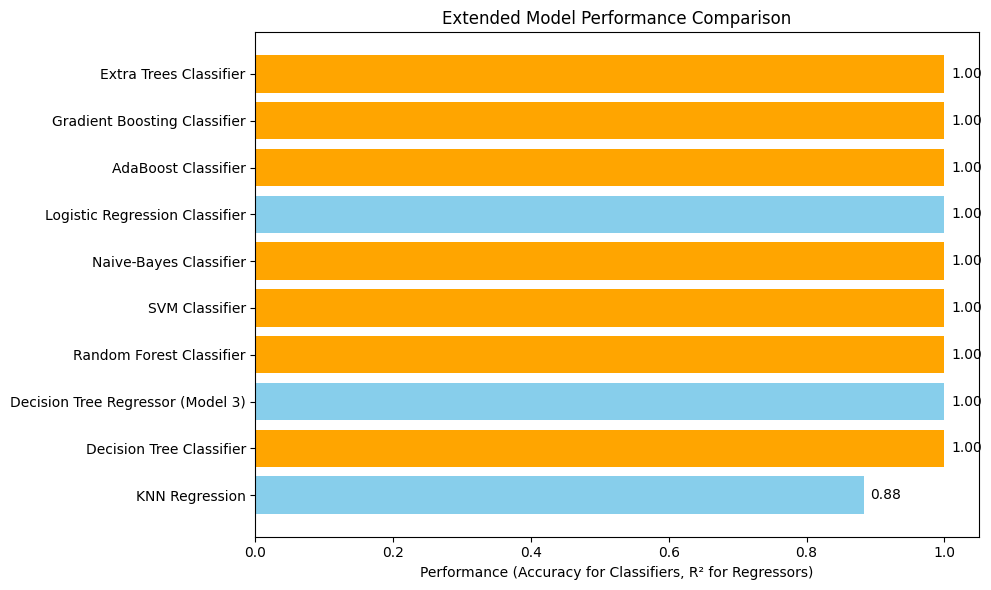

In [ ]:
# =========================
# Updated Model Evaluation & Comparison (including new models)
# =========================

print("\n===================== All Model Evaluations (Updated) =====================")
for model in model_results:
    print(f"Model: {model['Model']}")
    if model['Accuracy'] is not None:
        print(f"Accuracy: {model['Accuracy']:.4f}")
        print(f"Precision: {model['Precision']:.4f}")
        print(f"Recall: {model['Recall']:.4f}")
        print(f"F1: {model['F1']:.4f}")
    if model['MAE'] is not None:
        print(f"MAE: {model['MAE']:.4f}")
        print(f"RMSE: {model['RMSE']:.4f}")
        print(f"R²: {model['R2']:.4f}")
    print("-" * 50)

# Plot updated comparison
model_names = []
scores = []

for model in model_results:
    model_names.append(model["Model"])
    # Use Accuracy for classifiers, R² for regressors
    if model["Accuracy"] is not None:
        scores.append(model["Accuracy"])
    elif model["R2"] is not None:
        scores.append(model["R2"])
    else:
        scores.append(0)  # fallback

plt.figure(figsize=(10,6))
bars = plt.barh(model_names, scores, color=['skyblue' if 'Regress' in m else 'orange' for m in model_names])
plt.xlabel("Performance (Accuracy for Classifiers, R² for Regressors)")
plt.title("Extended Model Performance Comparison")
plt.xlim(0, 1.05)

# Add values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()


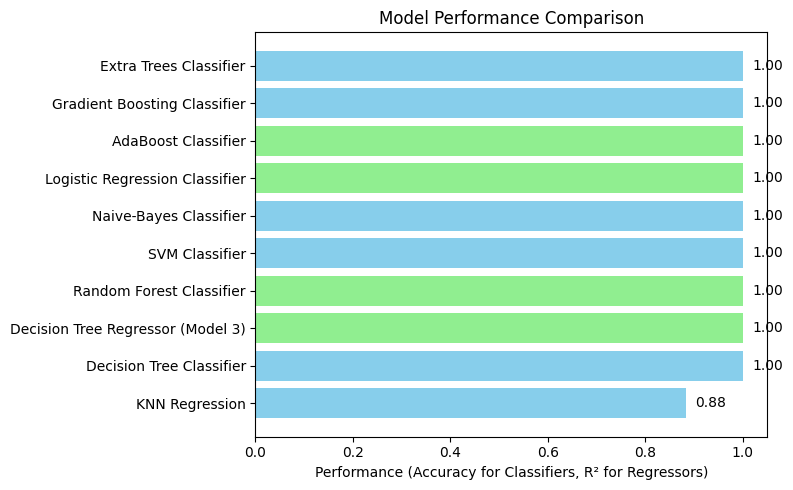

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for plotting
model_names = []
scores = []

for model in model_results:
    model_names.append(model["Model"])
    # Use Accuracy for classifiers, R² for regressors
    if model["Accuracy"] is not None:
        scores.append(model["Accuracy"])
    elif model["R2"] is not None:
        scores.append(model["R2"])
    else:
        scores.append(0)  # fallback

# Plot
plt.figure(figsize=(8,5))
bars = plt.barh(model_names, scores, color=['skyblue', 'skyblue', 'lightgreen', 'lightgreen'])
plt.xlabel("Performance (Accuracy for Classifiers, R² for Regressors)")
plt.title("Model Performance Comparison")
plt.xlim(0, 1.05)  # since Accuracy/R² is between 0-1

# Add values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()


ASSIGNMENT - ***3***

In [ ]:
!pip install transformers pandas
import pandas as pd

In [ ]:
df = pd.read_csv("Cosmetic_Product_Reviews.csv")

# sentiment model
from transformers import pipeline
model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# create review_score column
df['review_score'] = df['Review_Text'].apply(lambda x: int(model(x)[0]['label'][0]))

# drop review text
df = df.drop(columns=['Review_Text'])

# save new file
df.to_csv("review_score.csv", index=False)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [2]:
# ============================================================
# RECOMMENDATION PREDICTION — Feature selection + required models
# (Linear Regression as regression + Manual Gradient Descent for linear regression)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, r2_score
)

# -------------------------
# Utility function: Cramer's V
# -------------------------
# Measures association strength between two categorical variables (0=no association, 1=perfect association)
def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.sum().sum()
    if n == 0:
        return 0.0
    return np.sqrt(chi2 / (n * (min(contingency.shape) - 1 + 1e-12)))

# -------------------------
# 1) Load dataset
# -------------------------
df = pd.read_csv("review_score.csv")  # Load your CSV file
print("Data shape:", df.shape)
display(df.head())  # Display first few rows

# Create binary target column for Recommendation: 1=Yes, 0=No
if "Recommendation_bin" not in df.columns:
    df["Recommendation_bin"] = df["Recommendation"].apply(lambda x: 1 if str(x).strip().lower() == "yes" else 0)

# -------------------------
# 2) Numeric correlation analysis
# -------------------------
# Get list of numeric features excluding the target
numeric_features = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ["Recommendation_bin"]]

# Compute correlation matrix including target
corr_matrix = df[numeric_features + ["Recommendation_bin"]].corr()

# Show correlation of numeric features with the target
print("\n=== Correlation with Recommendation_bin (numeric) ===")
target_corr = corr_matrix["Recommendation_bin"].drop("Recommendation_bin").abs().sort_values(ascending=False)
print(target_corr)

# Identify highly correlated numeric pairs to avoid multicollinearity
high_corr_pairs = []
threshold_high_corr = 0.7
for i, f1 in enumerate(numeric_features):
    for j, f2 in enumerate(numeric_features):
        if j > i:
            val = corr_matrix.at[f1, f2]
            if abs(val) > threshold_high_corr:
                high_corr_pairs.append((f1, f2, val))

# Print highly correlated numeric pairs
if high_corr_pairs:
    print("\n=== Highly correlated numeric pairs (>|0.7|) ===")
    for f1, f2, val in high_corr_pairs:
        print(f"{f1} <-> {f2}: {val:.3f}")
else:
    print("\nNo highly correlated numeric pairs > 0.7 detected.")

# -------------------------
# 3) Categorical association analysis (Cramer's V)
# -------------------------
# Consider all categorical columns except Product_Name and Recommendation
categorical_features = [c for c in df.columns if df[c].dtype == "object" and c not in ["Product_Name", "Recommendation"]]
print("\nCategorical features considered:", categorical_features)

# Compute Cramer's V for each categorical feature vs Recommendation_bin
cat_scores = []
print("\n=== Cramer's V (categorical vs Recommendation_bin) ===")
for cat in categorical_features:
    try:
        v = cramers_v(df[cat].fillna("NA"), df["Recommendation_bin"])
    except Exception:
        v = 0.0
    cat_scores.append((cat, v))
    print(f"{cat:20}: {v:.3f}")

# -------------------------
# 4) Final feature selection logic
# -------------------------
# Keep all categorical features as requested (after recording Cramer's V)
cats_to_use = [c for c, v in cat_scores]

# Always include Price if present
numerics_to_use = []
if "Price" in numeric_features:
    numerics_to_use.append("Price")

# From highly correlated numeric pairs, choose the one with higher correlation to target
used_numeric = set()
for f1, f2, val in high_corr_pairs:
    c1 = target_corr.get(f1, 0)
    c2 = target_corr.get(f2, 0)
    better = f1 if abs(c1) >= abs(c2) else f2
    if better not in numerics_to_use and better not in used_numeric:
        numerics_to_use.append(better)
    used_numeric.update([f1, f2])

# Add numeric predictors with at least small correlation to target (>0.05)
for num in numeric_features:
    if num not in numerics_to_use and num not in used_numeric:
        if abs(target_corr.get(num, 0)) > 0.05:
            numerics_to_use.append(num)

# Ensure at least one of Rating or review_score is included
if "Rating" in numeric_features and "Rating" not in numerics_to_use and "review_score" in numeric_features and "review_score" not in numerics_to_use:
    r_rate = target_corr.get("Rating", 0)
    r_rev = target_corr.get("review_score", 0)
    numerics_to_use.append("Rating" if abs(r_rate) >= abs(r_rev) else "review_score")

# Combine numeric + categorical features
final_features = numerics_to_use + cats_to_use
print("\nRECOMMENDED FINAL FEATURES:")
print(final_features)

# -------------------------
# 5) Build modeling dataframe
# -------------------------
model_df = pd.DataFrame()

# Include selected numeric features
for num in numerics_to_use:
    if num in df.columns:
        model_df[num] = df[num].astype(float).fillna(df[num].median())

# One-hot encode selected categorical features
if cats_to_use:
    df_cats = df[cats_to_use].fillna("NA").astype(str)
    df_cats_dummies = pd.get_dummies(df_cats, drop_first=True)
    model_df = pd.concat([model_df, df_cats_dummies], axis=1)

# Include target
model_df["Recommendation_bin"] = df["Recommendation_bin"].astype(int)

print("\nModel dataframe shape:", model_df.shape)
print("Sample columns (first 40):", model_df.columns.tolist()[:40])

# -------------------------
# 6) Prepare X, y and scaling
# -------------------------
X = model_df.drop(columns=["Recommendation_bin"])
y = model_df["Recommendation_bin"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features for models (important for PCA, Perceptron, GD)

# -------------------------
# 7) PCA visualization (2 components)
# -------------------------
# Reduce dimensionality to 2 PCs for visualization
pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(X_scaled)
var = pca.explained_variance_ratio_  # Variance explained by PC1 and PC2

plt.figure(figsize=(8,6))
plt.scatter(pcs[:,0], pcs[:,1], c=y, cmap="viridis", alpha=0.8)
plt.colorbar(label="Recommendation_bin")
plt.xlabel(f"PC1 ({var[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({var[1]*100:.1f}%)")
plt.title("PCA (2 components) - Selected features")
plt.show()

# -------------------------
# 8) Train/test split
# -------------------------
# Stratified split ensures class balance in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

# -------------------------
# 9) Required models
# -------------------------

# ---- A) Linear Regression (as regression)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds_cont = lr.predict(X_test)  # Continuous predictions
lr_preds_class = (lr_preds_cont >= 0.5).astype(int)  # Threshold for classification

# Regression metrics for LR
def reg_metrics_continuous(name, y_true_cont, y_pred_cont):
    mae = mean_absolute_error(y_true_cont, y_pred_cont)
    mse = mean_squared_error(y_true_cont, y_pred_cont)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_cont, y_pred_cont)
    print(f"\n--- {name} (regression metrics) ---")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R2   : {r2:.4f}")

reg_metrics_continuous("Linear Regression (sklearn)", y_test, lr_preds_cont)

# Classification metrics from thresholded LR
def cls_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\n--- {name} (classification metrics from thresholded regression) ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"MAE      : {mae:.4f}")
    print(f"MSE      : {mse:.4f}")
    print(f"RMSE     : {rmse:.4f}")

cls_metrics("Linear Regression (thresholded)", y_test, lr_preds_class)

# ---- B) KMeans clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train)
k_preds_raw = kmeans.predict(X_test)

# Map cluster labels to actual target labels based on majority voting in training set
train_clusters = kmeans.predict(X_train)
cluster_map = {}
for cl in np.unique(train_clusters):
    mask = (train_clusters == cl)
    majority_label = int(pd.Series(y_train.values[mask]).mode().iloc[0])
    cluster_map[cl] = majority_label
k_preds = np.array([cluster_map[c] for c in k_preds_raw])
cls_metrics("KMeans (mapped clusters)", y_test, k_preds)

# ---- C) Perceptron (sklearn)
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=0)
perceptron.fit(X_train, y_train)
perc_preds = perceptron.predict(X_test)
cls_metrics("Perceptron (sklearn)", y_test, perc_preds)

# ---- D) Manual Gradient Descent for LINEAR REGRESSION
# Batch GD minimizing MSE (continuous regression)
def manual_linear_gd(X, y, lr=0.01, epochs=3000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0.0
    y_arr = y if isinstance(y, np.ndarray) else y.values
    for epoch in range(epochs):
        preds = X.dot(w) + b
        err = preds - y_arr
        dw = (2/m) * (X.T.dot(err))
        db = (2/m) * np.sum(err)
        w -= lr * dw
        b -= lr * db
    return w, b

# Fit manual GD model
w_lin, b_lin = manual_linear_gd(X_train, y_train.values, lr=0.01, epochs=5000)
gd_preds_cont = X_test.dot(w_lin) + b_lin
gd_preds_class = (gd_preds_cont >= 0.5).astype(int)

# Regression metrics for manual GD
reg_metrics_continuous("Manual Linear GD", y_test, gd_preds_cont)
# Classification metrics from thresholded GD
cls_metrics("Manual Linear GD (thresholded)", y_test, gd_preds_class)

# -------------------------
# 10) Summary comparison table
# -------------------------
summary = {
    "model": [
        "LinearRegression(regression)",
        "LinearRegression(thresholded)",
        "ManualLinearGD(regression)",
        "ManualLinearGD(thresholded)",
        "KMeans(mapped)",
        "Perceptron"
    ],
    "MAE": [
        mean_absolute_error(y_test, lr_preds_cont),
        mean_absolute_error(y_test, lr_preds_class),
        mean_absolute_error(y_test, gd_preds_cont),
        mean_absolute_error(y_test, gd_preds_class),
        mean_absolute_error(y_test, k_preds),
        mean_absolute_error(y_test, perc_preds)
    ],
    "MSE": [
        mean_squared_error(y_test, lr_preds_cont),
        mean_squared_error(y_test, lr_preds_class),
        mean_squared_error(y_test, gd_preds_cont),
        mean_squared_error(y_test, gd_preds_class),
        mean_squared_error(y_test, k_preds),
        mean_squared_error(y_test, perc_preds)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, lr_preds_cont)),
        np.sqrt(mean_squared_error(y_test, lr_preds_class)),
        np.sqrt(mean_squared_error(y_test, gd_preds_cont)),
        np.sqrt(mean_squared_error(y_test, gd_preds_class)),
        np.sqrt(mean_squared_error(y_test, k_preds)),
        np.sqrt(mean_squared_error(y_test, perc_preds))
    ],
    "Accuracy": [
        None,
        accuracy_score(y_test, lr_preds_class),
        None,
        accuracy_score(y_test, gd_preds_class),
        accuracy_score(y_test, k_preds),
        accuracy_score(y_test, perc_preds)
    ],
    "Precision": [
        None,
        precision_score(y_test, lr_preds_class, zero_division=0),
        None,
        precision_score(y_test, gd_preds_class, zero_division=0),
        precision_score(y_test, k_preds, zero_division=0),
        precision_score(y_test, perc_preds, zero_division=0)
    ],
    "Recall": [
        None,
        recall_score(y_test, lr_preds_class, zero_division=0),
        None,
        recall_score(y_test, gd_preds_class, zero_division=0),
        recall_score(y_test, k_preds, zero_division=0),
        recall_score(y_test, perc_preds, zero_division=0)
    ],
    "F1": [
        None,
        f1_score(y_test, lr_preds_class, zero_division=0),
        None,
        f1_score(y_test, gd_preds_class, zero_division=0),
        f1_score(y_test, k_preds, zero_division=0),
        f1_score(y_test, perc_preds, zero_division=0)
    ]
}

summary_df = pd.DataFrame(summary)
print("\n=== SUMMARY TABLE ===")
display(summary_df)

# -------------------------
# 11) Final selected features for record
# -------------------------
print("\nFINAL SELECTED NUMERIC FEATURES:", numerics_to_use)
print("FINAL SELECTED CATEGORICAL FEATURES (one-hot sample):")
print(list(df_cats_dummies.columns)[:40] if len(cats_to_use) > 0 else "None")

# ============================================================
# END
# ============================================================


FileNotFoundError: [Errno 2] No such file or directory: 'review_score.csv'